In [146]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Evaluating Classifiers

**Overview**
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.

Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training a random Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Evaluation</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance visualization reflection</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves evaluati…</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data

---
**Task 1 (easy): Generating Data👩‍💻**
1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.


---

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
import classifier_util

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 

---
**Task 2 (easy): Training a random Classifier👩‍💻**
1. Run the cell below to train a random Classifier.


---

In [148]:
classifier1 = classifier_util.RandomClassifier(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)


---
**Task 3 (easy): Model accuracy👩‍💻**
Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `RandomClassifier`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 


---

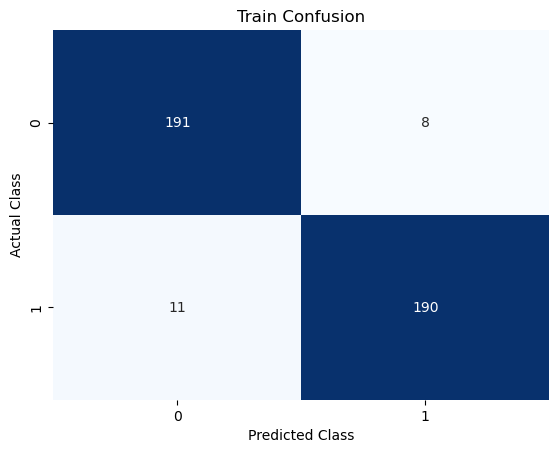

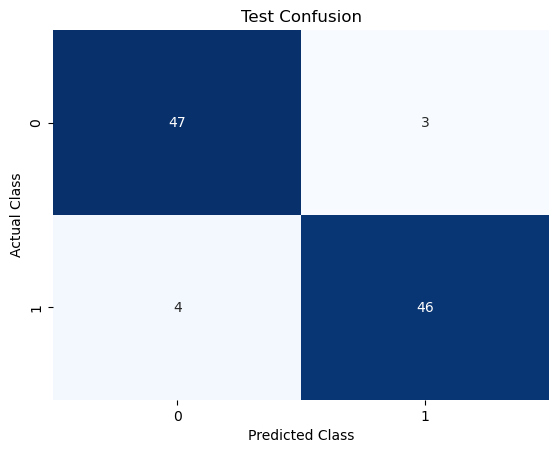

In [149]:
Y_preds = classifier1.predict(X_test)
Y_preds2 = classifier1.predict(X_train)

def show_conf_mat(y_train, y_preds):
    conf_mat_train = confusion_matrix(y_train, y_preds)
    sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Train Confusion')
    plt.show()

# Calculate accuracy here ... 
conf_mat_train = confusion_matrix(Y_train, Y_preds2)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Train Confusion')
plt.show()

conf_mat_test = confusion_matrix(Y_test, Y_preds)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Test Confusion')
plt.show()

**Performance metrics**

**Recall from the lecture**
Performance metrics such as **precision**, **recall**, **F$_1$-score**, **specificity** and **Matthews Correlation Coefficient (MCC)**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F$_1$-score** - harmonic mean of precision & recall. 

$$
2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$


- **Matthews Correlation Coefficient (MCC)** - also known as the phi coefficient, is a correlation-based metric that measures the quality of binary classifications, even with imbalanced classes.

$$ 
MCC=\frac{TP \cdot TN-FP \cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$





---
**Task 4 (easy): Performance metrics👩‍💻**
1. Use the confusion matrix of the test data from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity
    - MCC




---

In [150]:
class Confusius:
    def __init__(self, conf:  np.ndarray):
        self.conf = conf
        tn = conf[0,0]
        tp = conf[1,1]
        fp = conf[0,1]
        fn = conf[1,0]
        self.tn = tn
        self.tp = tp
        self.fn = fn
        self.fp = fp

        pre = tp/(tp+fp)
        rec = tp/(tp+fn)

        self.precision = pre
        self.recall = rec
        self.specificity = tn/(tn+fp)

        self.f1 = 2*pre*rec/(pre+rec)
        self.mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))


conf = Confusius(conf_mat_test)
print(f"{conf_mat_test=}")
print(f"{conf.precision=}")
print(f"{conf.recall=}")
print(f"{conf.specificity=}")
print(f"{conf.f1=}")
print(f"{conf.mcc=}")

conf_mat_test=array([[47,  3],
       [ 4, 46]])
conf.precision=np.float64(0.9387755102040817)
conf.recall=np.float64(0.92)
conf.specificity=np.float64(0.94)
conf.f1=np.float64(0.9292929292929293)
conf.mcc=np.float64(0.8601720516172061)



---
**Task 5 (easy): Evaluation💡📽️**
1. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?
2. How does the MCC help you assess the performance of the models?


---

1. 
    - Precision: We have a precision of 92 %, this indicates that 92% of the time the positive prediction actually belongs in the positive preditions.
    - Recall: How many to the positive items are actually classified correctly, i.e. how many of the positive class does the model 'recall'. We have a recall of 94%, which means that 94% of the time we make a prediction on a positive item, it is actually classified correctly.
    - Specificity: The inverse of recall, how many of the negative item are classified correctly. We have a specificity of 92%, which means that 92% of the time we make a prediction on a negative item, it is actually classified correctly.
    - F1: The F1 score is high only if both the recall and precision is high. i.e. if the both the recall and precision is 1 then the f1 score is 1 $\frac{2*1*1}{1+1}= 1$. So a high f1 score of 92% means that both our recall and precision are relatively high.
    - MCC: The MCC evaluates the binary classification, also in terms of imbalance, if there is a lot of true positives and no true negatives, then the value will be negative (if there are false negatives and false positives), i.e in disagreement. This is essentially the correlation between the classes and the predictions made, if there is no correlation between the the classification is no better than random guessing. The mcc is reasonably high at 86% meaning there is a high correlation between the classifications made and the classes. We're essentially doing is pearsons correlation when calculating the MCC, i.e. it is mathematically equivilent to computing the correlation matrix for 2 values.
2. MCC helps assessing how good the model performs, taking into account imbalanced data.


## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [151]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10



---
**Task 6 (hard): Class Imbalance👩‍💻**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop so that for each fold:    - Train a `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity, MCC). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 




**Info**
In the cell below, the data is randomized before each split. This can lead to slight variations in model performance metrics and graphs, so different results can be expected with each run.


---

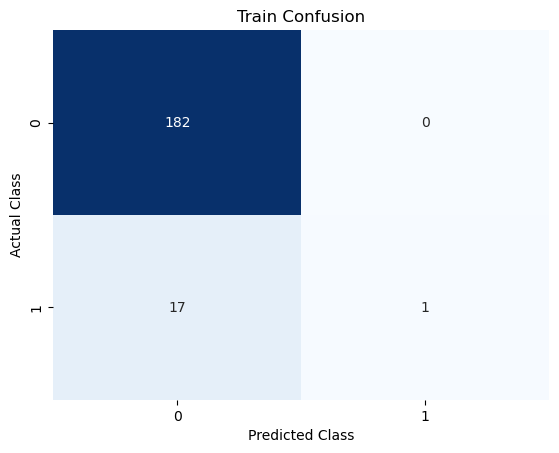

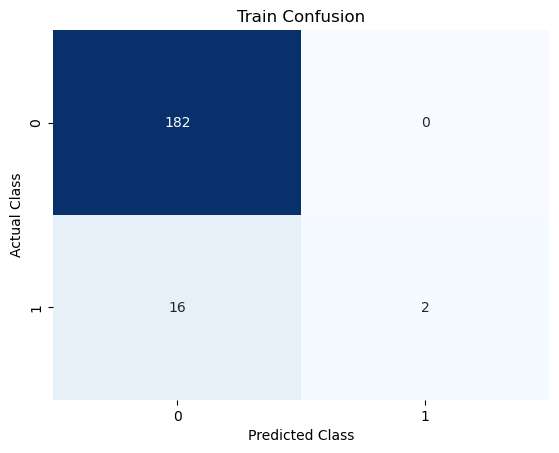

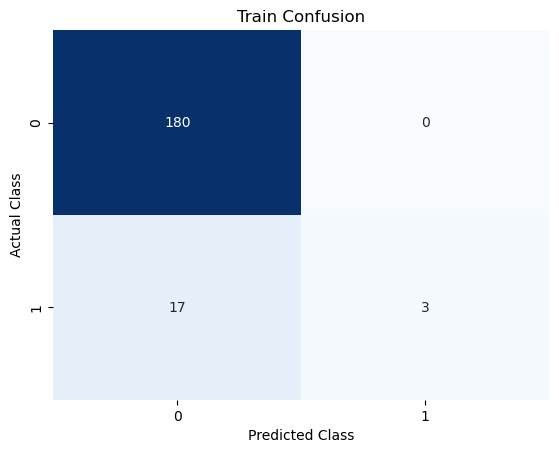

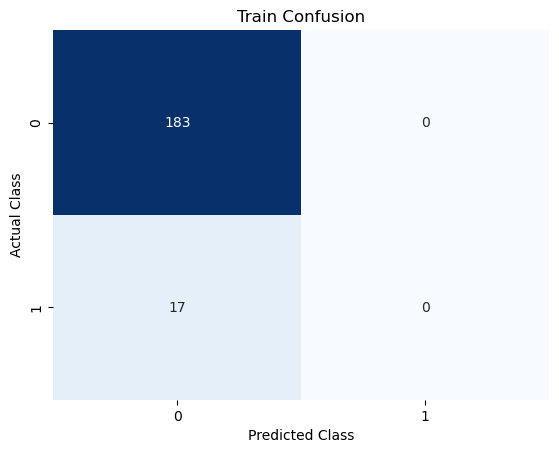

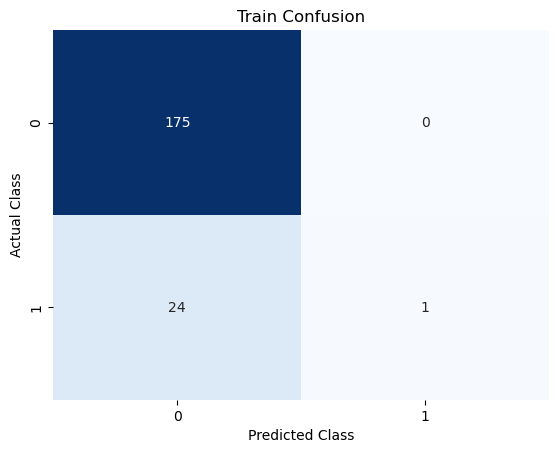

Accuracy 0.909
Accuracy [0.915, 0.92, 0.915, 0.915, 0.88]
Precision 1.0
Precision [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(nan), np.float64(1.0)]
Recall 0.07133333333333333
Recall [np.float64(0.05555555555555555), np.float64(0.1111111111111111), np.float64(0.15), np.float64(0.0), np.float64(0.04)]
F1 Score 0.16076395000880123
F1 Score [np.float64(0.10526315789473684), np.float64(0.19999999999999998), np.float64(0.2608695652173913), np.float64(nan), np.float64(0.07692307692307693)]
Specificity 1.0
Specificity [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]
MCC 0.2756885957471188
MCC [np.float64(0.22540985686837803), np.float64(0.3195816569607348), np.float64(0.37021053140537724), np.float64(nan), np.float64(0.18755233775398514)]


In [152]:
accuracies, precisions, recalls, f1_scores, specificities, mccs = [], [], [], [], [], []

classifier2 = classifier_util.RandomClassifier2()

for train_idx_svc, test_idx_svc in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]
    classifier2.fit(X_train, Y_train)
    Y_preds = classifier2.predict(X_test)
    show_conf_mat(Y_test, Y_preds)
    accuracies.append(accuracy_score(Y_test, Y_preds))
    conf = Confusius(confusion_matrix(Y_test, Y_preds))
    precisions.append(conf.precision)
    recalls.append(conf.recall)
    f1_scores.append(conf.f1)
    specificities.append(conf.specificity)
    mccs.append(conf.mcc)

print("Accuracy",np.nanmean(accuracies))
print("Accuracy",accuracies)
print("Precision",np.nanmean(precisions))
print("Precision",precisions)
print("Recall",np.nanmean(recalls))
print("Recall",recalls)
print("F1 Score", np.nanmean(f1_scores))
print("F1 Score", f1_scores)
print("Specificity", np.nanmean(specificities))
print("Specificity", specificities)
print("MCC", np.nanmean(mccs))
print("MCC", mccs)


---
**Task 7 (hard): Class Imbalance💡📽️**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. Why do some of the metrics return NaNs?
2. Is the model able to reliably identify the minority class? 
3. What are the implications for the model's performance and its practical utility?
4. How does the MCC help you assess the performance of the models, especially regarding their ability to handle class imbalance? 


---

1. I have not experinced this, but if the denominator is 0 then the value is undefined, this could happen if there are no true prositive and no false negatives
2. No as can be seen on the precision score, the model tends to just classify data points as negatives
3. It is hard to argue that it can be used in practice as it does not generalize well, and there is a very low chance that it will actually classify a postive correctly.
4. MCC holds up on imbalanced datasets providing information regarding the agreement between both classes, the closer it is to 1 the larger the agreement 1 being perfect agreement. -1 is complete disagreement.


---
**Task 8 (hard): Class Imbalance visualization👩‍💻**
1. Run the cell below to plot all the metrics in the same plot.


**Info**
In the cell below, the data is randomized before each split. This can lead to slight variations in model performance metrics and graphs, so different results can be expected with each run.


---

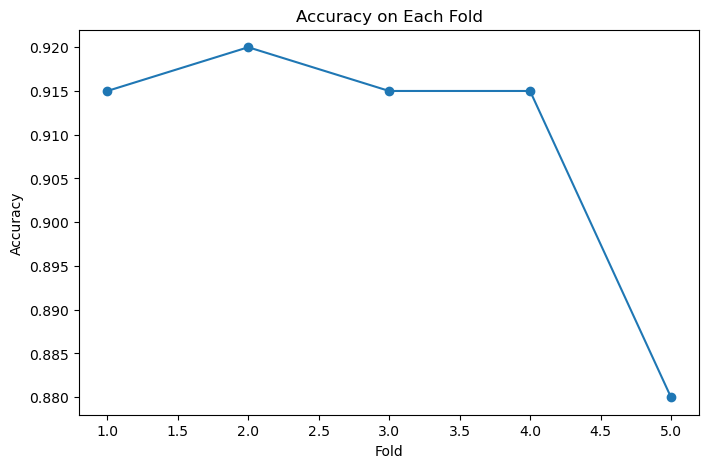

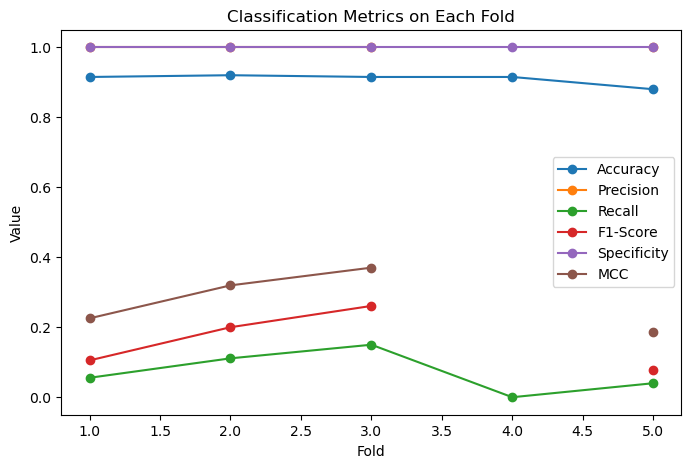

In [153]:
# Step 2
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# step 5
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'MCC']

# Create a list of the values for each metric
metric_values = [accuracies, precisions, recalls, f1_scores, specificities, mccs]

# Plot the metrics on the same plot
plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()


---
**Task 9 (hard): Class Imbalance visualization reflection💡**
1. Are certain metrics consistently lower? What might this indicate about the model’s handling of the imbalanced data?


---


Yes the MCC, F1-score and precision indicates that there is imbalance in the dataset, specifically when classifying the label true. This is a very strong indication of class-imbalance, as f1 is showing the balance between precision and recall. If one is consistently lower then f1 is going to be lower. In my case recall is consitently lower meaning this will negatively impact the f1-score.

## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.

---
**Task 10 (medium): ROC and Precision-Recall curves👩‍💻💡**
The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.


---

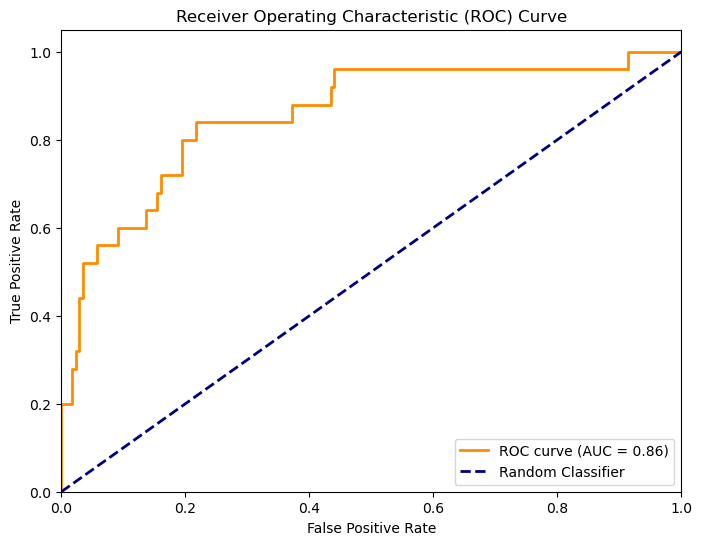

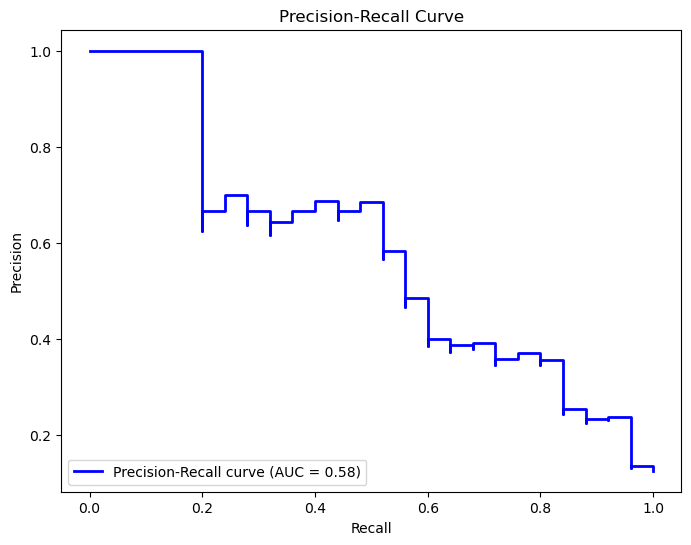

In [154]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


---
**Task 11 (medium): ROC and Precision-Recall curves evaluation💡📽️**
1. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
2. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.


---

1. The plots show a tradeoff pattern where in the ROC curve we see a tradeoff between true positives and false positives, 
